In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, date
import plotly.express as px

In [97]:
warnings.simplefilter(action='ignore', category=[FutureWarning,UserWarning])

In [4]:
%matplotlib inline

In [5]:
df_patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
df_ed_visits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
df_ambulatory_visits = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
df_re_admission_registry = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
df_discharge = pd.read_excel("HospitalDatabase.xlsx","Discharges")
df_providers = pd.read_excel("HospitalDatabase.xlsx","Providers")
df_ed_unique = pd.read_excel("HospitalDatabase.xlsx","EDUnique")

In [ ]:
df_patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
df_patients.head(10)

# 1. Calculate the time spent in ED Department for each visit.


In [32]:
df_ed_visits["TimeSpent"] =(df_ed_visits["EDDischargeTime"]-df_ed_visits["VisitDate"]).dt.seconds/3600
df_ed_visits

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition,TimeSpent
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted,11.339444
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted,23.238889
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted,1.848889
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted,1.335833
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted,2.638889
...,...,...,...,...,...,...,...,...
1194,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,Discharged,15.885833
1195,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,Discharged,22.451111
1196,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,Discharged,4.500833
1197,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,Discharged,6.176389


# 2.Get the  number of patients based on service and primary diagnosis.


In [ ]:
by_diaganosis = df_re_admission_registry.groupby(["PrimaryDiagnosis","Service"]).count()
by_diaganosis["PatientID"]

# 4. Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.  (Attach screenshots for this question)


In [98]:
import pymysql

import pandas as a

conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='Barkha*1984',db='pythonhackathon')

df=a.read_sql_query("SELECT ProviderName FROM Providers where ProviderName like 'T%' ",conn)

print(df)

   ProviderName
0     Ted Texas
1     Ted Green
2     Ted Black
3  Tyler Conner
4    Tony Creed
5     Trent Tye


# 5. Create a bar chart between expectedLOS & Primary diagnosis.


In [ ]:
sns.barplot(data = df_re_admission_registry, x="ExpectedLOS", y = "PrimaryDiagnosis")


# 6. Find the last name of the patients, by getting the first name from the user.


In [ ]:
name = input("Enter the last name to get the first name: ")
df_patients["LastName"].loc[df_patients['FirstName'] == name]

# 7. Find the list of patients whose ExpectedLOS is greater than the value given by the user.


In [ ]:
LOS = float(input("Enter the ExpectedLOS: "))
df_re_admission_registry[["PatientID","ExpectedLOS"]][df_re_admission_registry["ExpectedLOS"]>LOS]

# 8. Using Sunburst chart display the providers name by their provider speciality, considering their experience.


In [44]:
df_providers["Experience"] = (pd.to_datetime('today').year- df_providers["ProviderDateOnStaff"].dt.year)
df_providers
fig = px.sunburst(df_providers, path=['ProviderSpecialty','ProviderName'], values ="Experience" )
fig.show()


# 9.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.


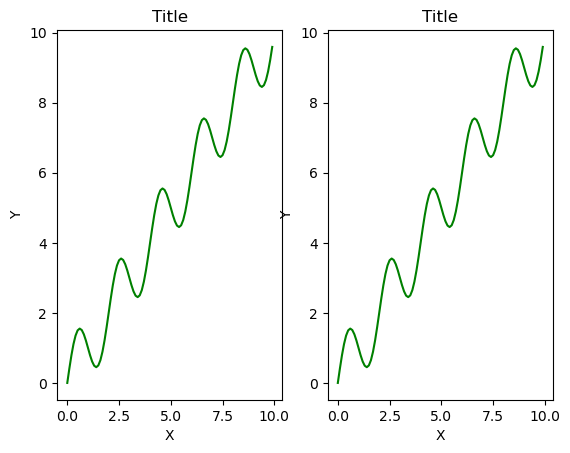

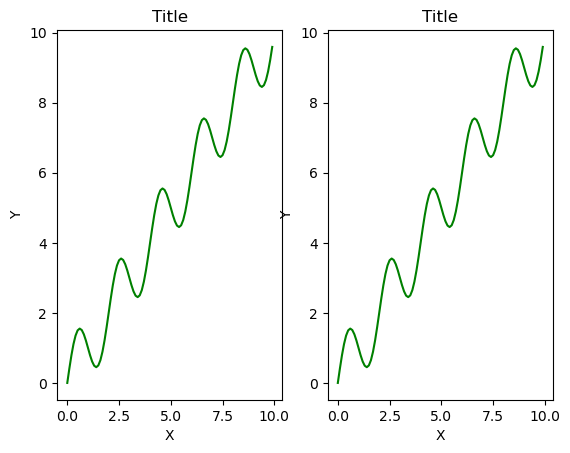

In [6]:
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
fig, axes = plt.subplots(nrows = 1, ncols = 2)
for ax in axes:
    ax.plot(x,y,"g")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Title')
fig



# 10.Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).


In [277]:
grouped_count = df_ed_visits.groupby(["EDDisposition","ReasonForVisit"]).count()
stacked = grouped_count.stack()
unstack_level = grouped_count.stack(level=0).unstack()
print(unstack_level["PatientID"])


EDDisposition  ReasonForVisit     
Admitted       Accident                39
               Bleeding                16
               Car Accident            17
               Chest Pain              94
               Fever                   46
               Gun Shot                16
               Migraine                47
               Pneumonia              136
               Shortness of Breath     72
               Stomach Ache            32
Discharged     Bleeding                15
               Chest Pain              15
               Cough                    1
               Fever                  188
               Intoxication            30
               Laceration              30
               Migraine               109
               Pneumonia               65
               Shortness of Breath     77
               Stomach Ache           154
Name: PatientID, dtype: int64


# 11. Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.


In [49]:
df_re_admission_registry["Date"] = pd.DatetimeIndex(df_re_admission_registry["DischargeDate"]).date
df_re_admission_registry["Time"] = pd.DatetimeIndex(df_re_admission_registry["DischargeDate"]).time
df_new = df_re_admission_registry[["Date", "Time"]].copy()
df_new

,Date,Time
0,2018-01-04,19:59:31.391000
1,2018-01-04,21:28:51.898000
2,2018-01-04,22:28:23.672000
3,2018-01-05,05:47:04.933000
4,2018-01-05,14:18:30.029000
...,...,...
715,2018-03-07,21:22:10.061000
716,2018-03-08,02:43:18.749000
717,2018-03-08,09:27:18.377000
718,2018-03-10,06:06:12.068000


# 12.Create a visualization on the count of patients based on primary diagnosis.


<Axes: xlabel='PatientID', ylabel='PrimaryDiagnosis'>

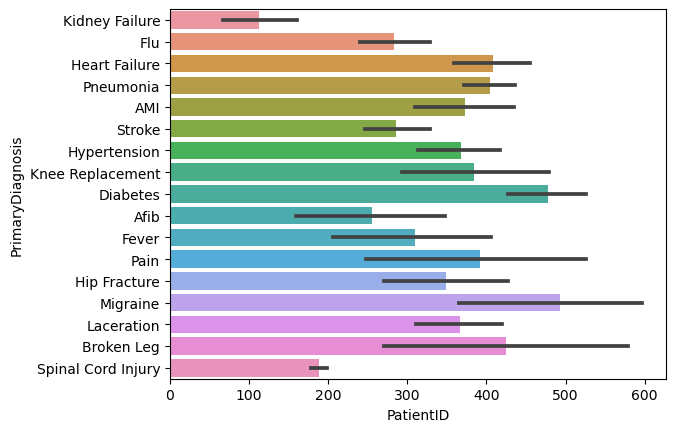

In [284]:
sns.barplot(data = df_re_admission_registry,x = "PatientID", y = "PrimaryDiagnosis")

# 13. Create a bar chart on service & expected length of stay.


<Axes: xlabel='Service', ylabel='ExpectedLOS'>

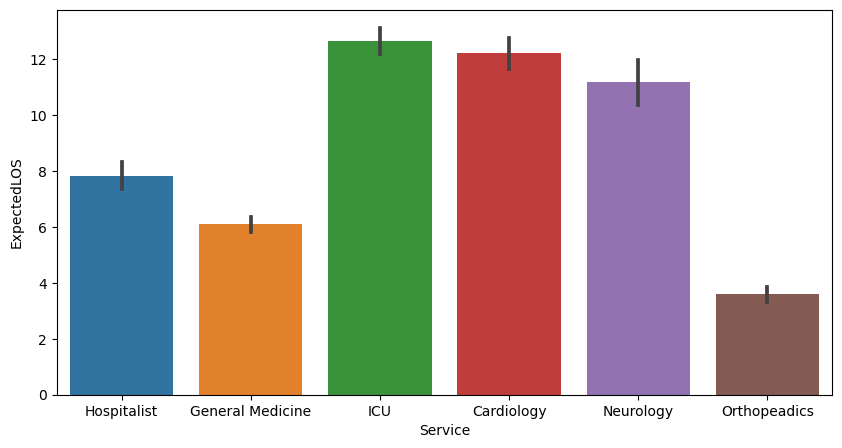

In [213]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data = df_re_admission_registry, x = "Service",y = "ExpectedLOS")


# 14. Find the count of Spanish Speaking patients.


In [169]:
df_patients["PatientID"][df_patients["Language"]=="Spanish"].count()

110

# 17. Connect to sql and write a query to get Ambulatory visit record's year. (Attach screenshots for this question)


In [107]:
import pymysql

import pandas as a

conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='Barkha*1984',db='pythonhackathon')

df=a.read_sql_query("SELECT distinct(SUBSTRING_INDEX(DateofVisit,'/',-1)) as RecordYear from ambulatory",conn)

print(df)

  RecordYear
0       2019


# 18. Display using a donut chart the patient count in the ReAdmissionRegistry.


In [ ]:
df_re_admission_registry[]

# 23. Add column 'Age' in Patient table.


In [8]:
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df_patients['Date'] = (pd.to_datetime(df_patients['DateOfBirth']).dt.date).astype(str)
df_patients['Age'] = df_patients['Date'].apply(age)
df_patients

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Date,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960-01-01,63
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985-11-15,37
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976-04-15,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968-10-15,54
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962-05-01,60
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986-05-26,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970-06-10,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983-01-08,40
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963-06-05,59


# 41. Find the age prone to get stroke.


# 42. Calculate mortality by diagnosis.


In [125]:
by_diaganosis = df_re_admission_registry.groupby("PrimaryDiagnosis").count()
by_diaganosis["ExpectedMortality"]

PrimaryDiagnosis
AMI                    48
Afib                   11
Broken Leg              9
Diabetes               64
Fever                  19
Flu                    80
Heart Failure          78
Hip Fracture           23
Hypertension           50
Kidney Failure         20
Knee Replacement       23
Laceration             29
Migraine               12
Pain                    7
Pneumonia             177
Spinal Cord Injury      2
Stroke                 68
Name: ExpectedMortality, dtype: int64

# 43. Details of patients whose first name or last name contains "lau"

In [7]:
newdf = df_patients[(df_patients['FirstName'].str.contains("lau", case = False) ) | (df_patients['LastName'].str.contains("lau",case = False))]

In [8]:
newdf

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
282,283,Lauren,Gaskal,1962-05-08 01:54:00.111,Female,Black/African-American,English
322,323,Lauren,Foort,1960-06-23 20:07:53.045,Female,White,English
369,370,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English
382,383,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English
454,455,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English
463,464,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English
850,851,Lemmy,Klausen,1973-06-18 06:19:43.475,Female,White,English
906,907,Jerrilyn,Klausen,1979-09-04 13:05:57.870,Male,Black/African-American,English


# 44. Display data by splitting age in 4 quartiles and labeling the quartiles.


In [207]:
df_patients['Quartile'], cut_bin = pd.qcut(df_patients['Age'], q = 4, labels = ['A','B', 'C', 'D'], retbins = True)
df_patients

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Date,Age,Quartile
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960-01-01,63,D
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985-11-15,37,A
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976-04-15,46,B
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968-10-15,54,C
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962-05-01,60,D
...,...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986-05-26,36,A
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970-06-10,52,C
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983-01-08,40,A
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963-06-05,59,D


# 45. Usage of Enumeration in Python with any example

In [212]:
drinks = ['tea', 'coffee', 'cappuccino', 'lemonade']
for elements in enumerate(drinks):
    print(elements)

(0, 'tea')
(1, 'coffee')
(2, 'cappuccino')
(3, 'lemonade')


In [213]:
#changing index and printing separately
for count, elements in enumerate(drinks,100):
    print(count,elements)

100 tea
101 coffee
102 cappuccino
103 lemonade


In [215]:
# getting desired output
for count, element in enumerate(drinks,100):
    print(count)
    print(element)

100
tea
101
coffee
102
cappuccino
103
lemonade


# 46.Count of cancelled status

In [20]:
new_df = df_ambulatory_visits[df_ambulatory_visits['VisitStatus']=='Canceled']["VisitID"]
new_df.count()

60

# 47. Display the patient details with maximum pulse pressure.


In [21]:
df_ambulatory_visits[df_ambulatory_visits['Pulse']==df_ambulatory_visits['Pulse'].max()]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
495,174,812,22,2019-02-19,2019-01-31 21:32:02.485,6,Follow Up,182.0,115.899432,99.986463,Completed


# 48. Create a heat map to show the correlation between the column values of Edvisits.


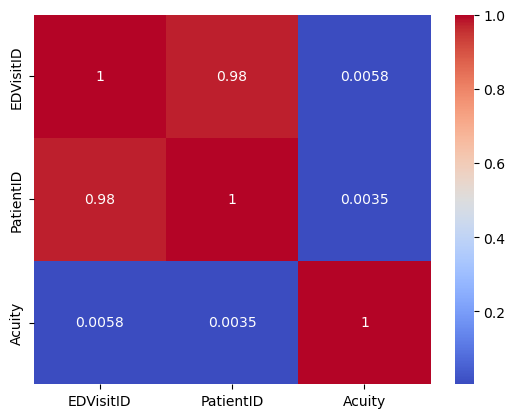

In [40]:
ed_visit = df_ed_visits.corr()
sns.heatmap(ed_visit,cmap = "coolwarm", annot=True)
plt.show()

# 49. Plot a graph by counting the no. of patients in each department.


<Axes: title={'center': 'No. of Patients per Department'}, xlabel='PatientMRN', ylabel='VisitDepartmentID'>

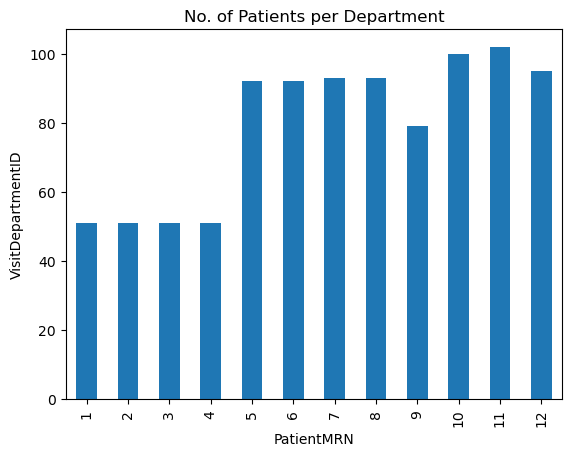

In [15]:
by_dept = df_ambulatory_visits.groupby("VisitDepartmentID").count()["PatientMRN"]
by_dept.plot(kind='bar',title="No. of Patients per Department", ylabel='VisitDepartmentID',
         xlabel='PatientMRN')

# 50. Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.


In [34]:
df_ed_visits[(df_ed_visits["ReasonForVisit"].isin(["Migrane","Pneumonia"])) & (df_ed_visits["Acuity"] > 2)]

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
12,30,30,2020-01-01 07:25:54.177,2020-01-01 23:30:20.151,3,Pneumonia,Admitted
13,31,31,2020-01-01 07:32:51.917,2020-01-01 19:55:46.991,4,Pneumonia,Admitted
16,44,44,2020-01-01 11:41:20.981,2020-01-02 05:18:13.677,4,Pneumonia,Admitted
21,53,53,2020-01-01 14:28:21.684,2020-01-01 22:29:33.906,4,Pneumonia,Admitted
24,56,55,2020-01-01 15:02:36.206,2020-01-02 10:40:08.571,4,Pneumonia,Admitted
...,...,...,...,...,...,...,...
488,1145,891,2020-01-14 22:17:55.508,2020-01-15 15:14:49.962,4,Pneumonia,Admitted
491,1158,904,2020-01-15 02:06:42.088,2020-01-15 07:04:01.523,4,Pneumonia,Admitted
496,1167,913,2020-01-15 05:09:22.987,2020-01-16 03:57:13.244,4,Pneumonia,Admitted
499,1170,916,2020-01-15 05:57:29.834,2020-01-15 06:03:50.631,4,Pneumonia,Admitted


# 51. Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.


In [98]:
reason = input("Enter the reason of visit to find the number of patients admitted with that reason: ")
if reason in df_ed_visits["ReasonForVisit"].values:
    by_reason = df_ed_visits.groupby("ReasonForVisit").count()["PatientID"]
    print(f"{by_reason.loc[reason]} patients are admitted for {reason}")
else:
    print("Enter a valid reason of visit")

Enter the reason of visit to find the number of patients admitted with that reason: as
Enter a valid reason of visit


# 52. Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.


In [53]:
df_ambulatory_visits.loc[df_ambulatory_visits["BloodPressureSystolic"].idxmax()]

VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                          190.0
BloodPressureDiastolic                    143.989174
Pulse                                      74.976879
VisitStatus                                Completed
Name: 236, dtype: object

# 53. Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).


In [54]:
x = np.linspace(0,5,10)
y = x ** 2

In [55]:
x

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

In [56]:
y

array([ 0.        ,  0.30864198,  1.2345679 ,  2.77777778,  4.9382716 ,
        7.71604938, 11.11111111, 15.12345679, 19.75308642, 25.        ])

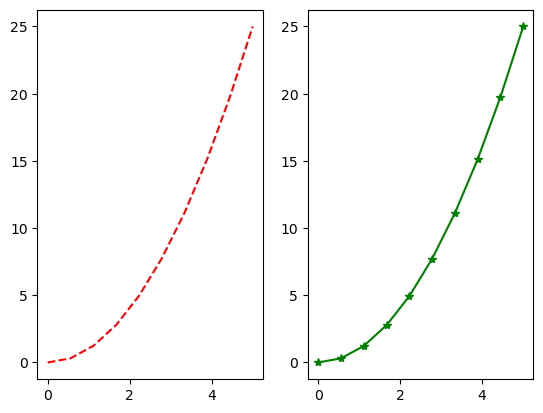

In [59]:
plt.subplot(1,2,1)
plt.plot(x,y,"r--")
plt.subplot(1,2,2)
plt.plot(x,y,"g*-")

# 54. Retrieve the row with minimum DBP using sorting technique.


In [66]:
df_ambulatory_visits.sort_values(by=["BloodPressureDiastolic"]).head(1)


,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


# 55. Replace all the null values in ReadmissionFlag with 0.


In [176]:
df_re_admission_registry["ReadmissionFlag"].fillna(0, inplace=True)
df_re_admission_registry["ReadmissionFlag"]

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
715    0.0
716    0.0
717    0.0
718    0.0
719    0.0
Name: ReadmissionFlag, Length: 720, dtype: float64

# 56. Get the list of patient ID's which are not there in ReadmissionRegistry.


In [142]:
common = df_patients.merge(df_re_admission_registry, on=["PatientID"])
df_patients[(~df_patients.PatientID.isin(common.PatientID))]["PatientID"].values


array([  4, 135, 145, 189, 200, 224, 234, 374, 378, 379, 380, 381, 382,
       383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395,
       396, 397, 398, 399, 414, 501, 562, 599, 690, 691, 704, 726, 743,
       744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756,
       757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769,
       770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782,
       783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795,
       796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808,
       809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821,
       822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834,
       835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847,
       848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860,
       861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873,
       874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 88

# 57. Find reasonForVisit with highest count of acuity 5 patients.


In [186]:
ed_visit = df_ed_visits.sort_values(by=["Acuity"],ascending=False).head(5)
ed_visit["ReasonForVisit"]

357    Shortness of Breath
453               Gun Shot
200                  Fever
201               Gun Shot
207              Pneumonia
Name: ReasonForVisit, dtype: object

# 58. Display full name of patients who are born in 1986.


In [168]:
(df_patients["FirstName"]+" "+df_patients["LastName"]).where(df_patients['DateOfBirth'].dt.year == 1986).dropna()


23         Gabriel  Joseph
24         Lincoln  Brenda
29             Ala Halpert
72            Lolita Darci
164         Fadel Bernardt
238         Bentley Kippax
367            Vale Olanda
373          Britt Dureden
386       Cristabel Chatel
415       Constantia Group
452       Morgan Scrowston
561             Dom Baglow
568        Ignazio Melling
595         Homenick Rings
639           Hashim Slark
643       Ellie Ramsbotham
674        Llewellyn Group
714             Niles Shaw
733             Yvette Inc
777          Siouxie Group
852            Carly Group
868        Worth Pickering
877           Arni Baldack
909       Kuvalis Coupland
922    Rebbecca Rollingson
940            Wat Fideler
dtype: object

# 59. Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.


In [193]:
ed_disposition = df_ed_visits["EDDisposition"].unique()
ed_disposition

array(['Admitted', 'Discharged'], dtype=object)

In [216]:
ed_acuity = df_ed_visits["Acuity"].unique()
ed_acuity

array([1, 2, 3, 4, 5], dtype=int64)

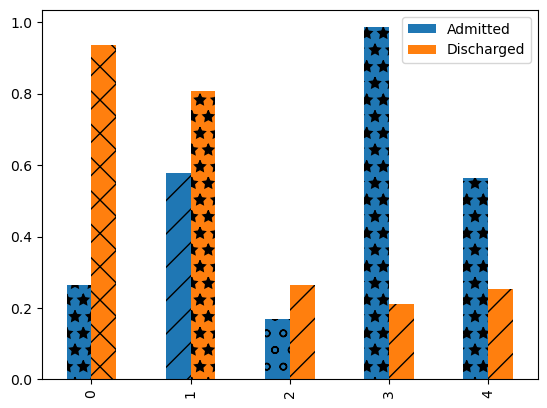

In [198]:
ed_disposition = df_ed_visits["EDDisposition"].unique()
df = pd.DataFrame(np.random.rand(5, 2), columns=ed_disposition)
ax = plt.figure().add_subplot(111)
bars = df.plot(ax=ax, kind='bar')
hatches = ["*", "/", "o", "x"]

for patch in bars.patches:
   patch.set_hatch(hatches[np.random.randint(10)%len(hatches)])

plt.show()

# 60. Create a heat map on Readmission Registry table to find correlation between columns values.


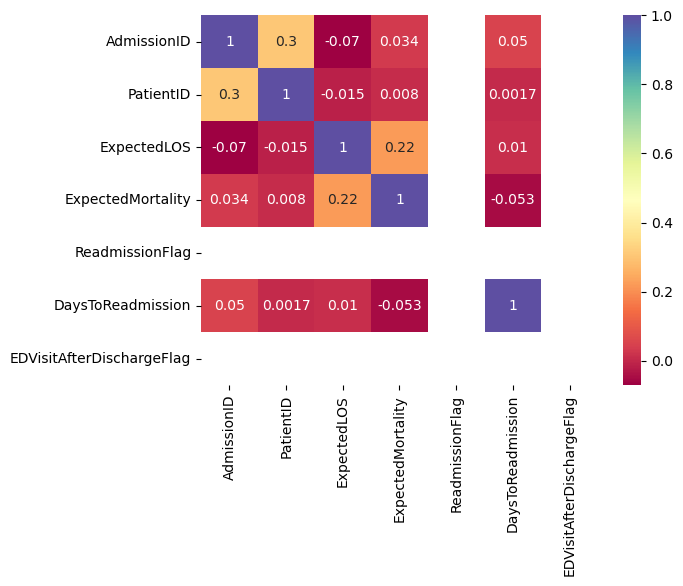

In [177]:
readmission_registry = df_re_admission_registry.corr()
sns.heatmap(readmission_registry,cmap = "Spectral", annot=True)
plt.show()